### Problem Statement

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

### Problem Statement


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors

### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market

### Data Preparation:

You can observe in the dataset that some of the variables like **'weathersit'** and **'season'** have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column **'yr'** with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

### Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. **The model should be built taking this 'cnt' as the target variable.**

### Model Evaluation:

When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

> from sklearn.metrics import r2_score

> r2_score(y_test, y_pred)

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1. Importing Necessary Python Libraries

In [2]:
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### 2. Inspecting the Dataframe

In [3]:
bike = pd.read_csv('day.csv')

In [4]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
bike.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729

In [6]:
bike.shape

(730, 16)

In [7]:
bike.size

11680

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### 3. Identifying missing value and Data Cleansing

In [10]:
# https://towardsdatascience.com/visualize-missing-values-with-missingno-ad4d938b00a1
# to install missingno
# conda install -c conda-forge missingno

In [11]:

conda install -c conda-forge missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


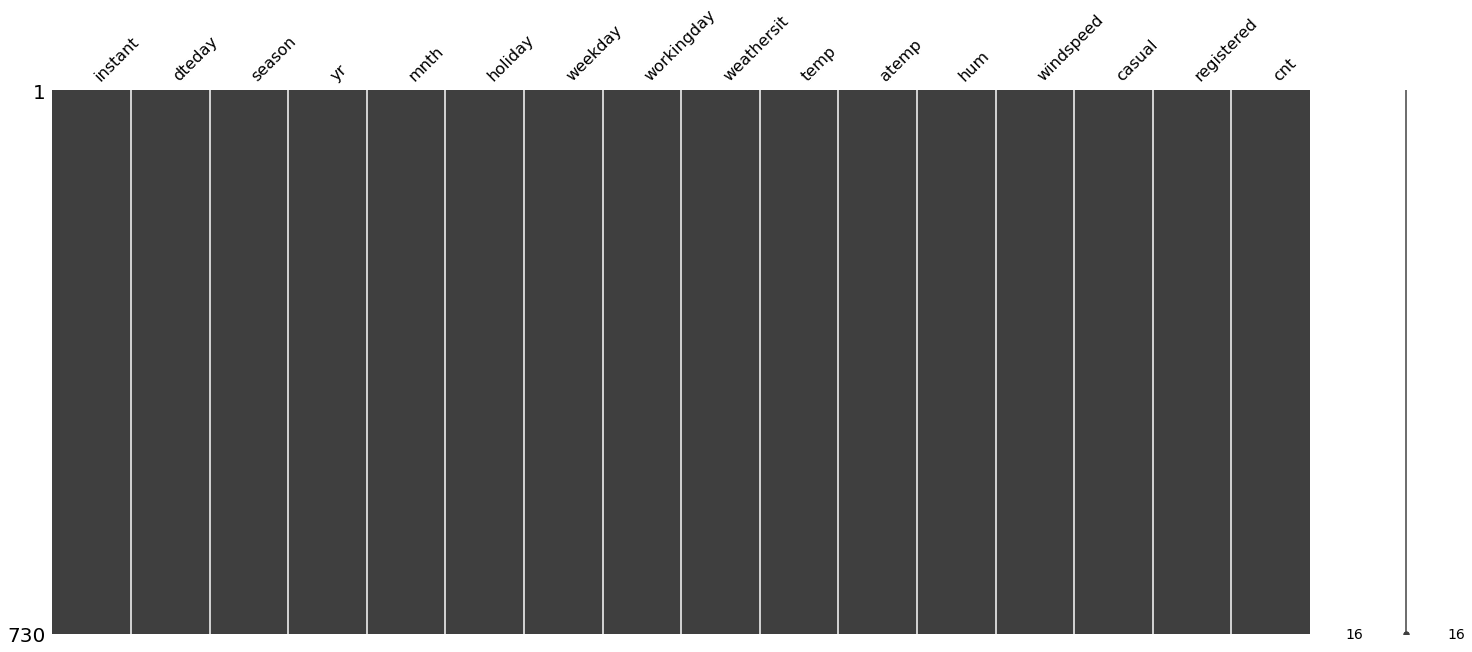

In [12]:
# Using missingno to visualize any missing values
import missingno as msno
msno.matrix(bike)

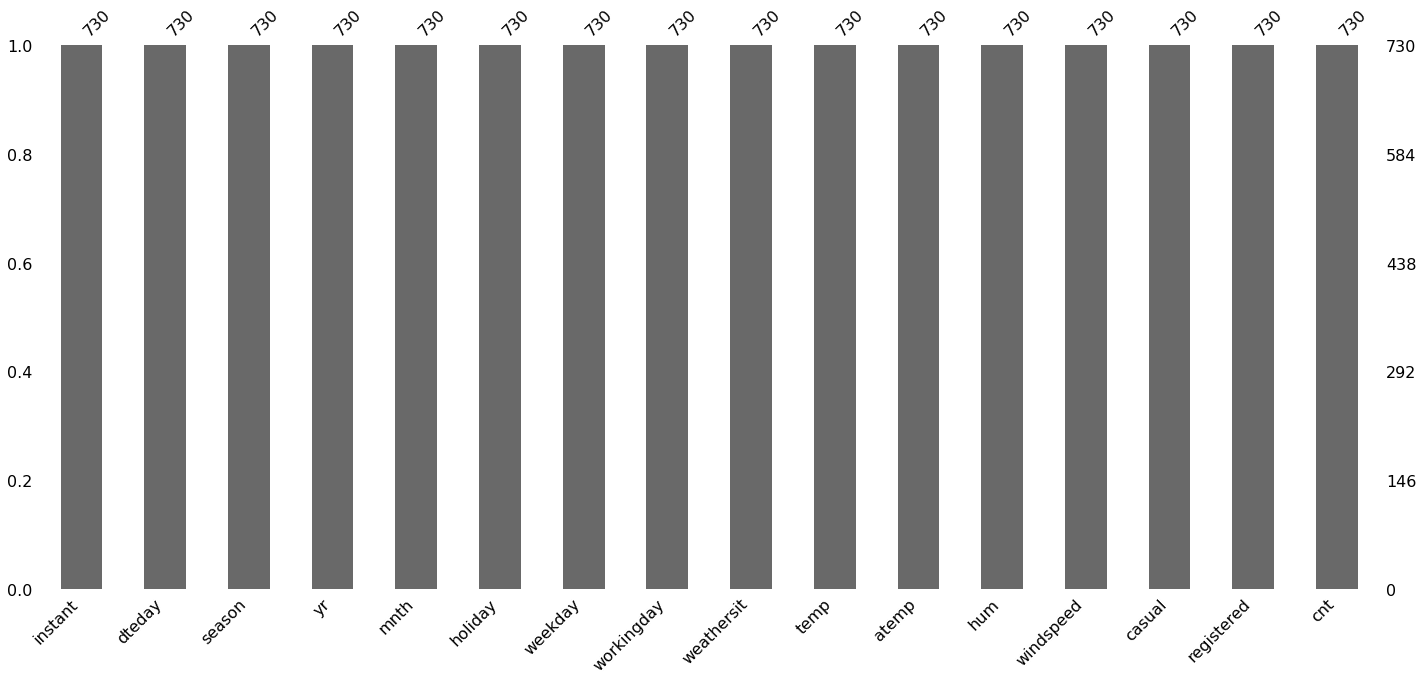

In [13]:
msno.bar(bike)

In [14]:
# Duplicate removal
bike_copy = bike
bike_copy.drop_duplicates(subset=None, inplace=True)

In [15]:
bike_copy.shape

(730, 16)

In [16]:
bike.shape

(730, 16)

In [17]:
# Hence there is no duplicate

<function matplotlib.pyplot.show(*args, **kw)>

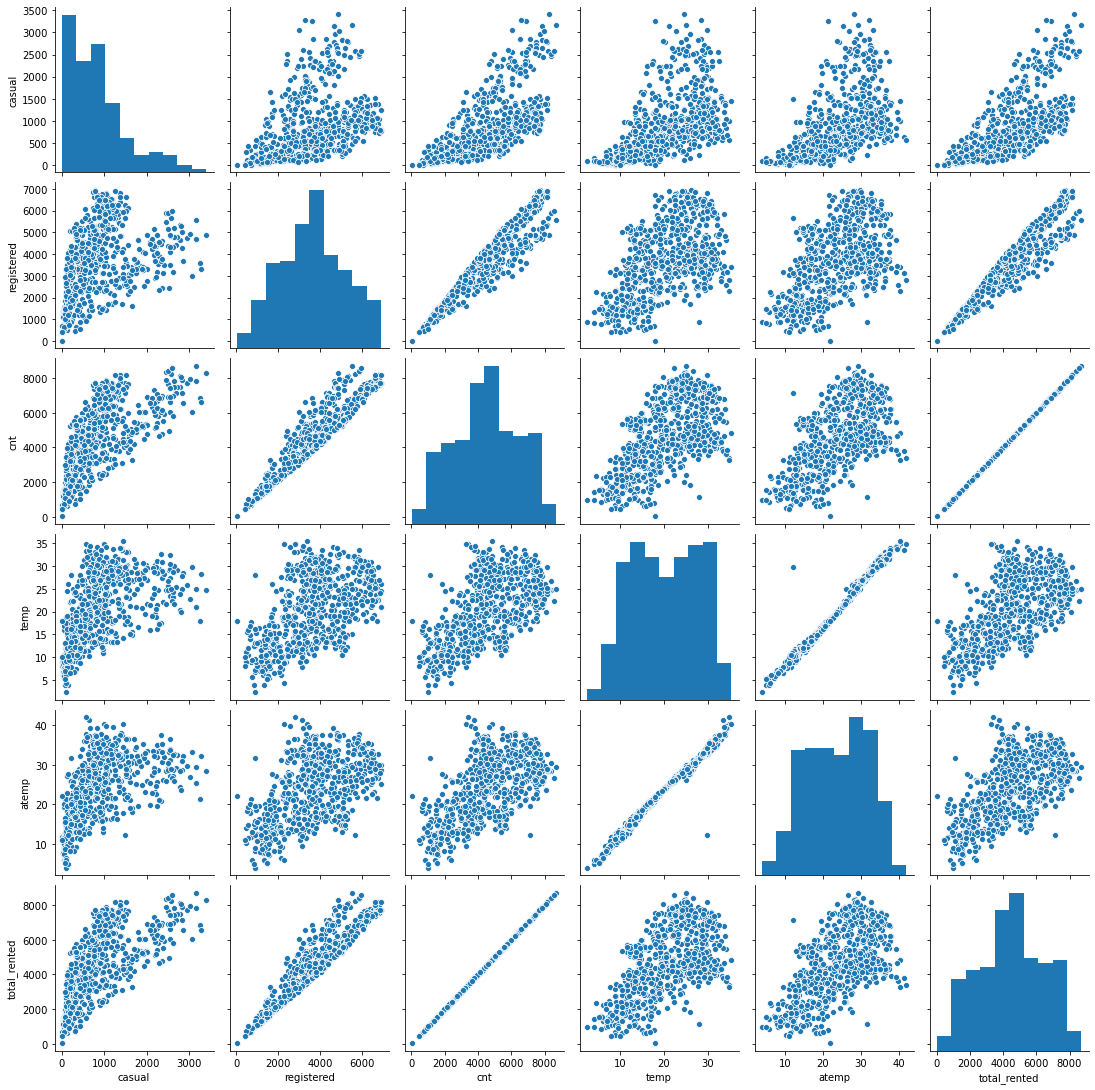

In [18]:
# Checking the correlation between casual, registered and cnt column
bike_cnt = bike[['casual','registered','cnt', 'temp','atemp']]
# Creating a column whch will show the value of casual + registered
bike_cnt['total_rented'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show

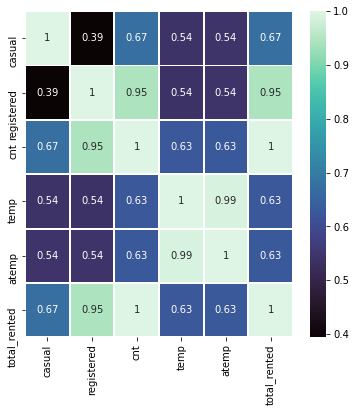

In [19]:
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="mako",linewidth =1)
plt.show()

In [20]:
# As you can see there is a high correlation between the total_rented vs registered and total_reanted vs casual
# therefore dropping the casual and registered
# column intant is just an index, so we can drop that as well
# column dteday is reduntant as we already have 'year' and 'month' columns

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 12)

### 4. Encoding Categorical columns

In [21]:
# converting months value to more readable values
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)

Oct    0.084932
Jan    0.084932
Jul    0.084932
Aug    0.084932
May    0.084932
Dec    0.084932
Mar    0.084932
Apr    0.082192
Jun    0.082192
Nov    0.082192
Sep    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [22]:
# converting seasons
bike.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bike.season.value_counts(normalize=True)

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [23]:
# from the readme.txt
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [24]:
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

Tuesday      0.143836
Monday       0.143836
Saturday     0.142466
Thursday     0.142466
Wednesday    0.142466
Sunday       0.142466
Friday       0.142466
Name: weekday, dtype: float64

### 5. Categorical Variable Analysis

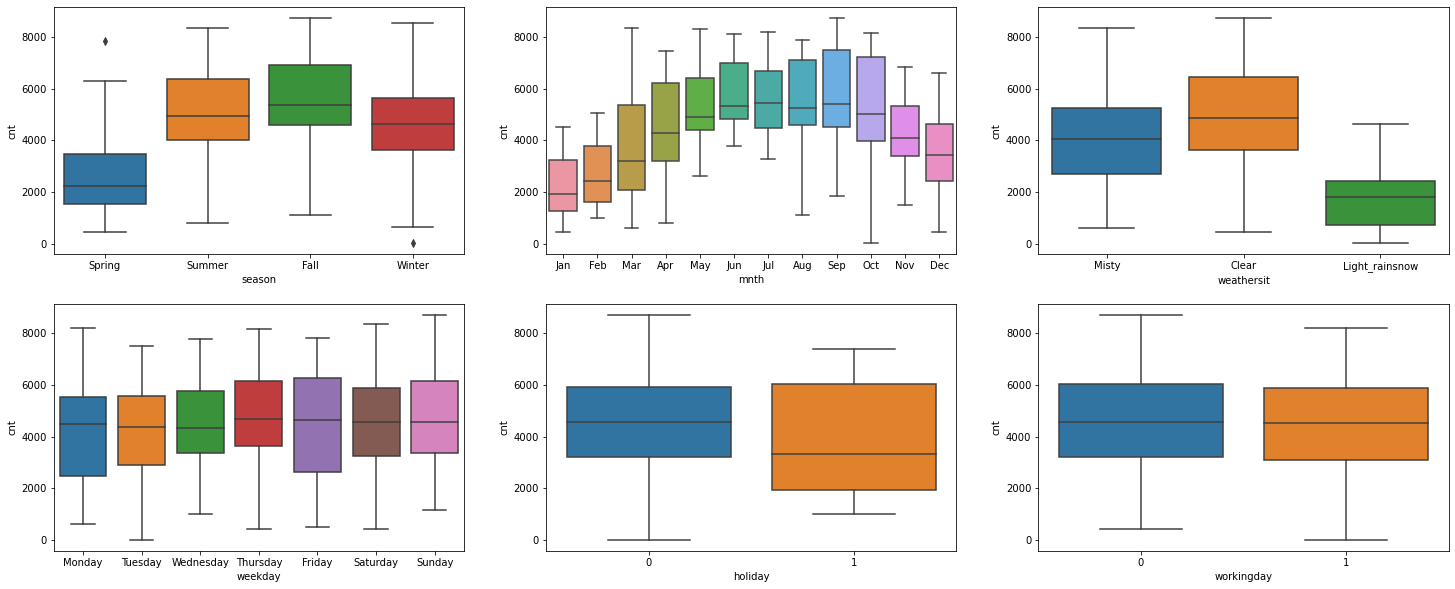

In [25]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [26]:
def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
    return round(cat_df,2)

def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='mako')
    plt.legend(labels=['2018', '2019'])
    return

**By season**

In [27]:
categorical_stats('season')

sum     mean  count  sum_perc  count_perc
season                                               
Fall    1061129  5644.30    188     32.24       25.75
Summer   918589  4992.33    184     27.91       25.21
Winter   841613  4728.16    178     25.57       24.38
Spring   469514  2608.41    180     14.27       24.66

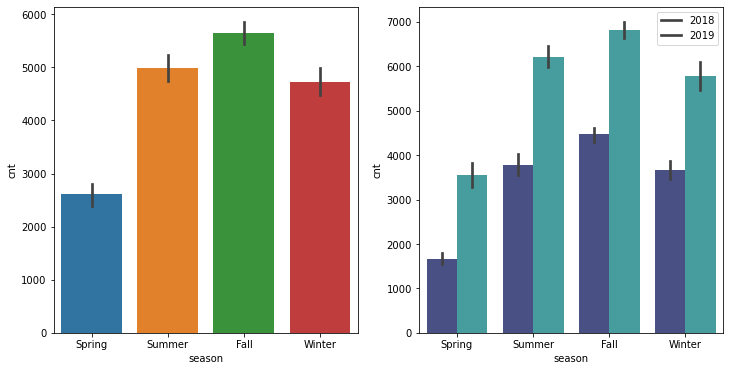

In [28]:
categorical_plot('season',12,6)

**Insights**
- 32.24% of the bike booked in Fall, followed by Summer and Winter
- Overall there is a significance raise in 2019

**Categorical analysis by Month**

In [29]:
categorical_stats('mnth')

sum     mean  count  sum_perc  count_perc
mnth                                              
Aug   351194  5664.42     62     10.67        8.49
Jun   346342  5772.37     60     10.52        8.22
Sep   345991  5766.52     60     10.51        8.22
Jul   344948  5563.68     62     10.48        8.49
May   331686  5349.77     62     10.08        8.49
Oct   322352  5199.23     62      9.80        8.49
Apr   269094  4484.90     60      8.18        8.22
Nov   254831  4247.18     60      7.74        8.22
Mar   228920  3692.26     62      6.96        8.49
Dec   211036  3403.81     62      6.41        8.49
Feb   149518  2669.96     56      4.54        7.67
Jan   134933  2176.34     62      4.10        8.49

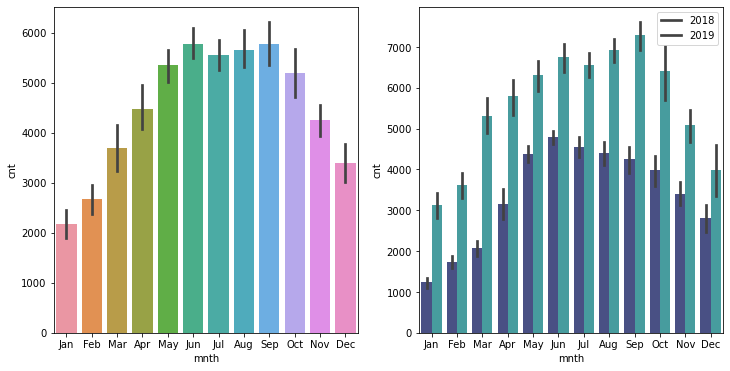

In [30]:
categorical_plot('mnth',12,6)

**Insight**
- Around 50% of the booking we made in the Months' May to Sep


### Categorical analysis by Month

In [31]:
categorical_stats('weathersit')

sum     mean  count  sum_perc  count_perc
weathersit                                                   
Clear           2257952  4876.79    463     68.61       63.42
Misty            995024  4044.81    246     30.24       33.70
Light_rainsnow    37869  1803.29     21      1.15        2.88

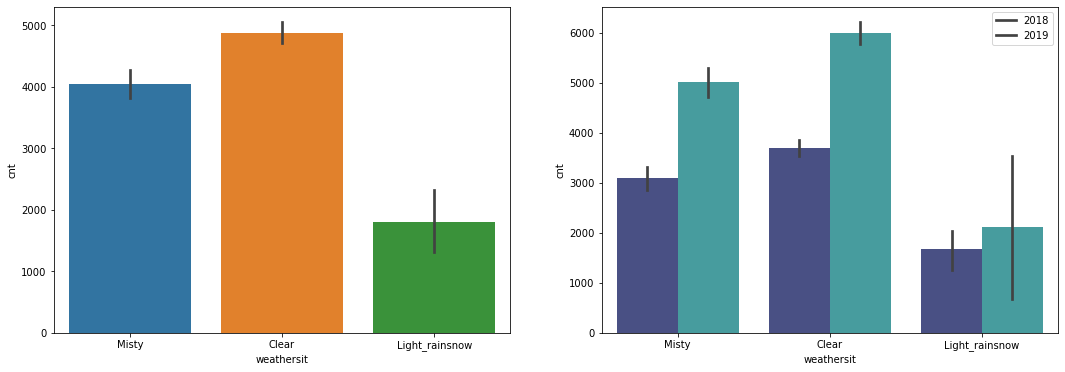

In [32]:
categorical_plot('weathersit',18,6)

**Insight**
- almost 68% bookings were made during the clear weather followed by almost 30% in Misty weather

### Categorical analysis by Weekday

In [33]:
categorical_stats('weekday')

sum     mean  count  sum_perc  count_perc
weekday                                                
Thursday   487923  4691.57    104     14.83       14.25
Sunday     485235  4665.72    104     14.74       14.25
Saturday   481176  4626.69    104     14.62       14.25
Friday     478132  4597.42    104     14.53       14.25
Wednesday  462276  4444.96    104     14.05       14.25
Tuesday    448822  4274.50    105     13.64       14.38
Monday     447281  4259.82    105     13.59       14.38

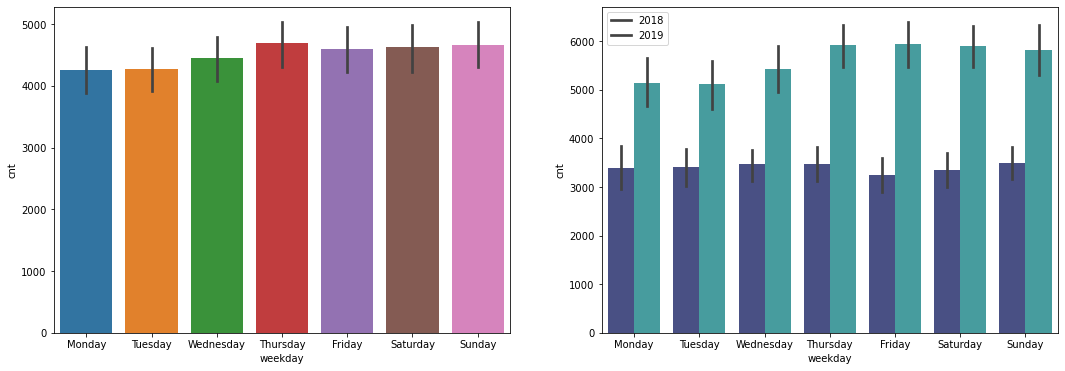

In [34]:
categorical_plot('weekday',18,6)

**Insights**
- Weekday shows close trend, every weekday contributes around 13% to 14% 

### Categorical analysis by Weekday

In [35]:
categorical_stats('holiday')

sum    mean  count  sum_perc  count_perc
holiday                                              
0        3212410  4530.9    709     97.62       97.12
1          78435  3735.0     21      2.38        2.88

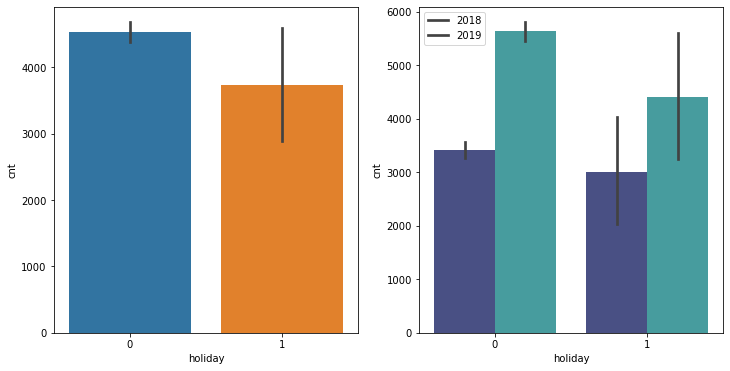

In [36]:
categorical_plot('holiday',12,6)

**Insights**
- Almost 97% of the booking we made in holiday. 

### Analysis by workingday

In [37]:
categorical_stats('workingday')

sum     mean  count  sum_perc  count_perc
workingday                                               
1           2253988  4472.20    504     68.49       69.04
0           1036857  4587.86    226     31.51       30.96

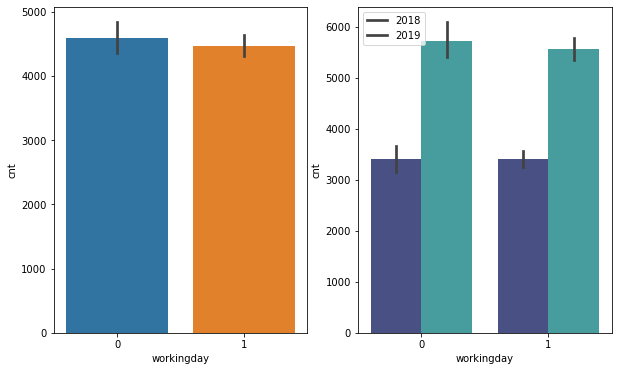

In [38]:
categorical_plot('workingday',10,6)

**Insights**
- Almost 69% of the booking were made in workingday

### Categorical analysis by year


In [39]:
categorical_stats('yr')

sum     mean  count  sum_perc  count_perc
yr                                               
1   2047742  5610.25    365     62.23        50.0
0   1243103  3405.76    365     37.77        50.0

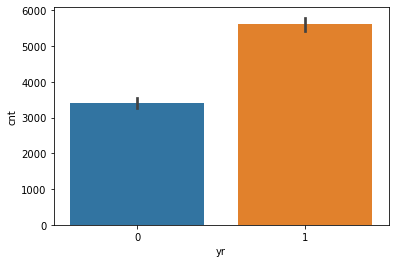

In [40]:
sns.barplot('yr', 'cnt', data=bike)
plt.show()

**Insights**
- Overall the bike rental demand has gone up from 2018 to 2019

### 6. Numerical variable analysis

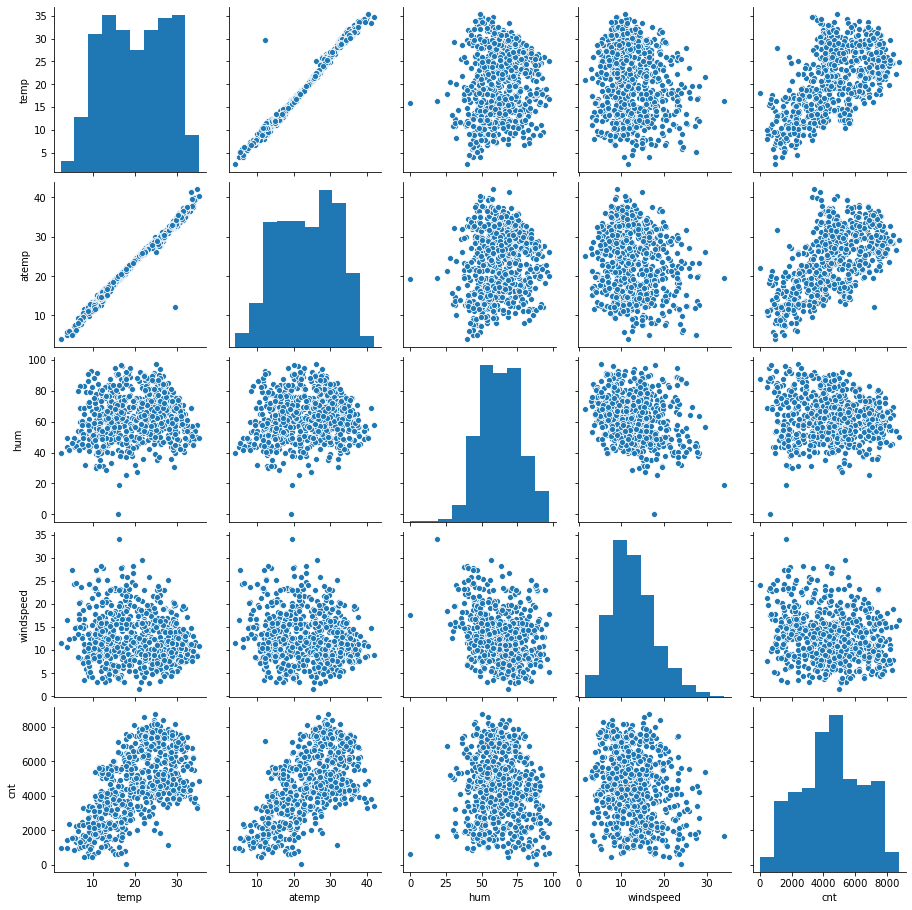

In [41]:
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

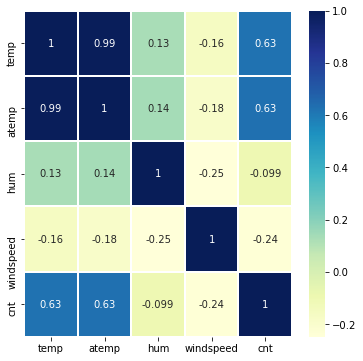

In [42]:
# Correlation

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="YlGnBu",linewidth =1)

**Insights**
- There is a linear relation between the atemp and temp. Both of the parameters cannot be used in the model due to multicolinearity

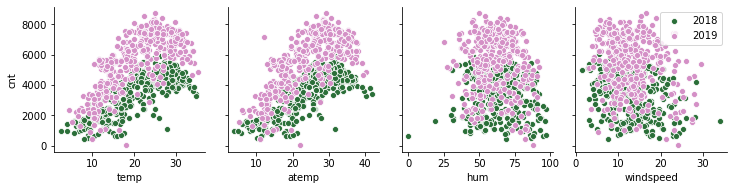

In [43]:
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr', palette='cubehelix')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

**Insight**
- Year parameter may be significant (as seen in the above chart)

### 7. Data Preparation

In [44]:
# let's create season dummy variable, as we know there are 4 seasons, so 3 would be enough to distinguish
season = pd.get_dummies(bike['season'], drop_first = True)
season.head(3)

Spring  Summer  Winter
0       1       0       0
1       1       0       0
2       1       0       0

In [45]:
# similarly for weather 2 columns would be enough to disguish
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head(3)

Light_rainsnow  Misty
0               0      1
1               0      1
2               0      0

In [46]:
# months
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head(3)

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0

In [47]:
# Weekday
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head(3)

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       1         0       0         0        0          0
1       0         0       0         0        1          0
2       0         0       0         0        0          1

In [48]:
# Merging the dataframe
bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head(3)

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0     Monday           1      Misty  14.110847   
1  Spring   0  Jan        0    Tuesday           1      Misty  14.902598   
2  Spring   0  Jan        0  Wednesday           1      Clear   8.050924   

      atemp      hum  ...  Oct  Sep  Light_rainsnow  Misty  Monday  Saturday  \
0  18.18125  80.5833  ...    0    0               0      1       1         0   
1  17.68695  69.6087  ...    0    0               0      1       0         0   
2   9.47025  43.7273  ...    0    0               0      0       0         0   

   Sunday  Thursday  Tuesday  Wednesday  
0       0         0        0          0  
1       0         0        1          0  
2       0         0        0          1  

[3 rows x 34 columns]

In [49]:
bike_new.shape

(730, 34)

In [50]:
bike_new.info

<bound method DataFrame.info of      season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0    Spring   0  Jan        0     Monday           1      Misty  14.110847   
1    Spring   0  Jan        0    Tuesday           1      Misty  14.902598   
2    Spring   0  Jan        0  Wednesday           1      Clear   8.050924   
3    Spring   0  Jan        0   Thursday           1      Clear   8.200000   
4    Spring   0  Jan        0     Friday           1      Clear   9.305237   
..      ...  ..  ...      ...        ...         ...        ...        ...   
725  Spring   1  Dec        0     Friday           1      Misty  10.420847   
726  Spring   1  Dec        0   Saturday           0      Misty  10.386653   
727  Spring   1  Dec        0     Sunday           0      Misty  10.386653   
728  Spring   1  Dec        0     Monday           1      Clear  10.489153   
729  Spring   1  Dec        0    Tuesday           1      Misty   8.849153   

        atemp      hum  ...  Oc

In [51]:
# dropping off the unnecessary columns
bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

In [52]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Spring          730 non-null    uint8  
 9   Summer          730 non-null    uint8  
 10  Winter          730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

### 8. Splitting the data

In [53]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

In [54]:
bike_train.shape

(510, 30)

In [55]:
bike_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.501961    0.023529    0.690196   20.218078   23.590696   62.340743   
std      0.500487    0.151726    0.462867    7.500110    8.138271   14.418728   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.717924   16.744800   51.604150   
50%      1.000000    0.000000    1.000000   20.209597   23.973425   62.233700   
75%      1.000000    0.000000    1.000000   26.786653   30.327087   72.958300   
max      1.000000    1.000000    1.000000   35.328347   42.044800   96.250000   

        windspeed          cnt      Spring      Summer  ...         Oct  \
count  510.000000   510.000000  510.000000  510.000000  ...  510.000000   
mean    12.771365  4494.103922    0.250980    0.245098  ...    0.084314   
std      5.205888  1948.315655    0.434003    0.430568  ...    0.278131   
min      1.500244    22.000000    0.000000    0.000000  ...    0.000000   
25%      9.011098  3146.500000    0.000000    0.000000  ...    0.000000   
50%     12.125057  4508.000000    0.000000    0.000000  ...    0.000000   
75%     15.624869  5962.750000    0.750000    0.000000  ...    0.000000   
max     34.000021  8714.000000    1.000000    1.000000  ...    1.000000   

              Sep  Light_rainsnow       Misty      Monday    Saturday  \
count  510.000000      510.000000  510.000000  510.000000  510.000000   
mean     0.082353        0.025490    0.343137    0.141176    0.143137   
std      0.275172        0.157763    0.475223    0.348545    0.350557   
min      0.000000        0.000000    0.000000    0.000000    0.000000   
25%      0.000000        0.000000    0.000000    0.000000    0.000000   
50%      0.000000        0.000000    0.000000    0.000000    0.000000   
75%      0.000000        0.000000    1.000000    0.000000    0.000000   
max      1.000000        1.000000    1.000000    1.000000    1.000000   

           Sunday    Thursday     Tuesday   Wednesday  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.145098    0.139216    0.152941    0.131373  
std      0.352545    0.346511    0.360284    0.338139  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [56]:
bike_test.shape

(220, 30)

In [57]:
bike_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.495455    0.040909    0.690909   20.553817   24.040727   63.749086   
std      0.501120    0.198531    0.463173    7.533926    8.188064   13.790510   
min      0.000000    0.000000    0.000000    3.957390    4.941955   29.000000   
25%      0.000000    0.000000    0.000000   14.189577   17.366525   53.260450   
50%      0.000000    0.000000    1.000000   20.756250   24.762725   63.687500   
75%      1.000000    0.000000    1.000000   27.119778   30.903325   73.333350   
max      1.000000    1.000000    1.000000   34.815847   41.318550   97.250000   

        windspeed          cnt      Spring      Summer  ...         Oct  \
count  220.000000   220.000000  220.000000  220.000000  ...  220.000000   
mean    12.745665  4540.236364    0.236364    0.268182  ...    0.086364   
std      5.184271  1911.199159    0.425817    0.444023  ...    0.281541   
min      3.875669   506.000000    0.000000    0.000000  ...    0.000000   
25%      9.041851  3193.000000    0.000000    0.000000  ...    0.000000   
50%     12.146128  4593.500000    0.000000    0.000000  ...    0.000000   
75%     15.643227  5959.750000    0.000000    1.000000  ...    0.000000   
max     28.292425  8395.000000    1.000000    1.000000  ...    1.000000   

              Sep  Light_rainsnow       Misty      Monday    Saturday  \
count  220.000000      220.000000  220.000000  220.000000  220.000000   
mean     0.081818        0.036364    0.322727    0.150000    0.140909   
std      0.274713        0.187620    0.468586    0.357886    0.348721   
min      0.000000        0.000000    0.000000    0.000000    0.000000   
25%      0.000000        0.000000    0.000000    0.000000    0.000000   
50%      0.000000        0.000000    0.000000    0.000000    0.000000   
75%      0.000000        0.000000    1.000000    0.000000    0.000000   
max      1.000000        1.000000    1.000000    1.000000    1.000000   

           Sunday    Thursday     Tuesday   Wednesday  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.136364    0.150000    0.122727    0.168182  
std      0.343957    0.357886    0.328872    0.374881  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

### 9. Rescaling bike_train dataframe

In [58]:
scaler = MinMaxScaler()

In [59]:
bike_train.head(3)

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
650   1        0           0  16.126653  19.5698  49.4583   9.791514  7109   
212   0        0           1  31.638347  35.1646  55.0833  10.500039  4266   
714   1        0           1  14.862500  18.4969  83.8750   6.749714  3786   

     Spring  Summer  ...  Oct  Sep  Light_rainsnow  Misty  Monday  Saturday  \
650       0       0  ...    1    0               0      0       0         0   
212       0       0  ...    0    0               0      0       0         0   
714       0       0  ...    0    0               0      1       1         0   

     Sunday  Thursday  Tuesday  Wednesday  
650       1         0        0          0  
212       0         0        0          1  
714       0         0        0          0  

[3 rows x 30 columns]

In [60]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head(3)

yr  holiday  workingday      temp     atemp       hum  windspeed  \
650   1        0           0  0.416433  0.409971  0.513852   0.255118   
212   0        0           1  0.887856  0.819376  0.572294   0.276919   
714   1        0           1  0.378013  0.381804  0.871429   0.161523   

          cnt  Spring  Summer  ...  Oct  Sep  Light_rainsnow  Misty  Monday  \
650  0.815347       0       0  ...    1    0               0      0       0   
212  0.488265       0       0  ...    0    0               0      0       0   
714  0.433042       0       0  ...    0    0               0      1       1   

     Saturday  Sunday  Thursday  Tuesday  Wednesday  
650         0       1         0        0          0  
212         0       0         0        0          1  
714         0       0         0        0          0  

[3 rows x 30 columns]

In [61]:
bike_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.501961    0.023529    0.690196    0.540777    0.515530    0.647696   
std      0.500487    0.151726    0.462867    0.227939    0.213652    0.149805   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.343228    0.335807    0.536147   
50%      1.000000    0.000000    1.000000    0.540519    0.525578    0.646584   
75%      1.000000    0.000000    1.000000    0.740406    0.692378    0.758008   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      Spring      Summer  ...         Oct  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.346806    0.514508    0.250980    0.245098  ...    0.084314   
std      0.160182    0.224150    0.434003    0.430568  ...    0.278131   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.231105    0.359468    0.000000    0.000000  ...    0.000000   
50%      0.326920    0.516107    0.000000    0.000000  ...    0.000000   
75%      0.434607    0.683473    0.750000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep  Light_rainsnow       Misty      Monday    Saturday  \
count  510.000000      510.000000  510.000000  510.000000  510.000000   
mean     0.082353        0.025490    0.343137    0.141176    0.143137   
std      0.275172        0.157763    0.475223    0.348545    0.350557   
min      0.000000        0.000000    0.000000    0.000000    0.000000   
25%      0.000000        0.000000    0.000000    0.000000    0.000000   
50%      0.000000        0.000000    0.000000    0.000000    0.000000   
75%      0.000000        0.000000    1.000000    0.000000    0.000000   
max      1.000000        1.000000    1.000000    1.000000    1.000000   

           Sunday    Thursday     Tuesday   Wednesday  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.145098    0.139216    0.152941    0.131373  
std      0.352545    0.346511    0.360284    0.338139  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

**Checking Correlation Coefficient**

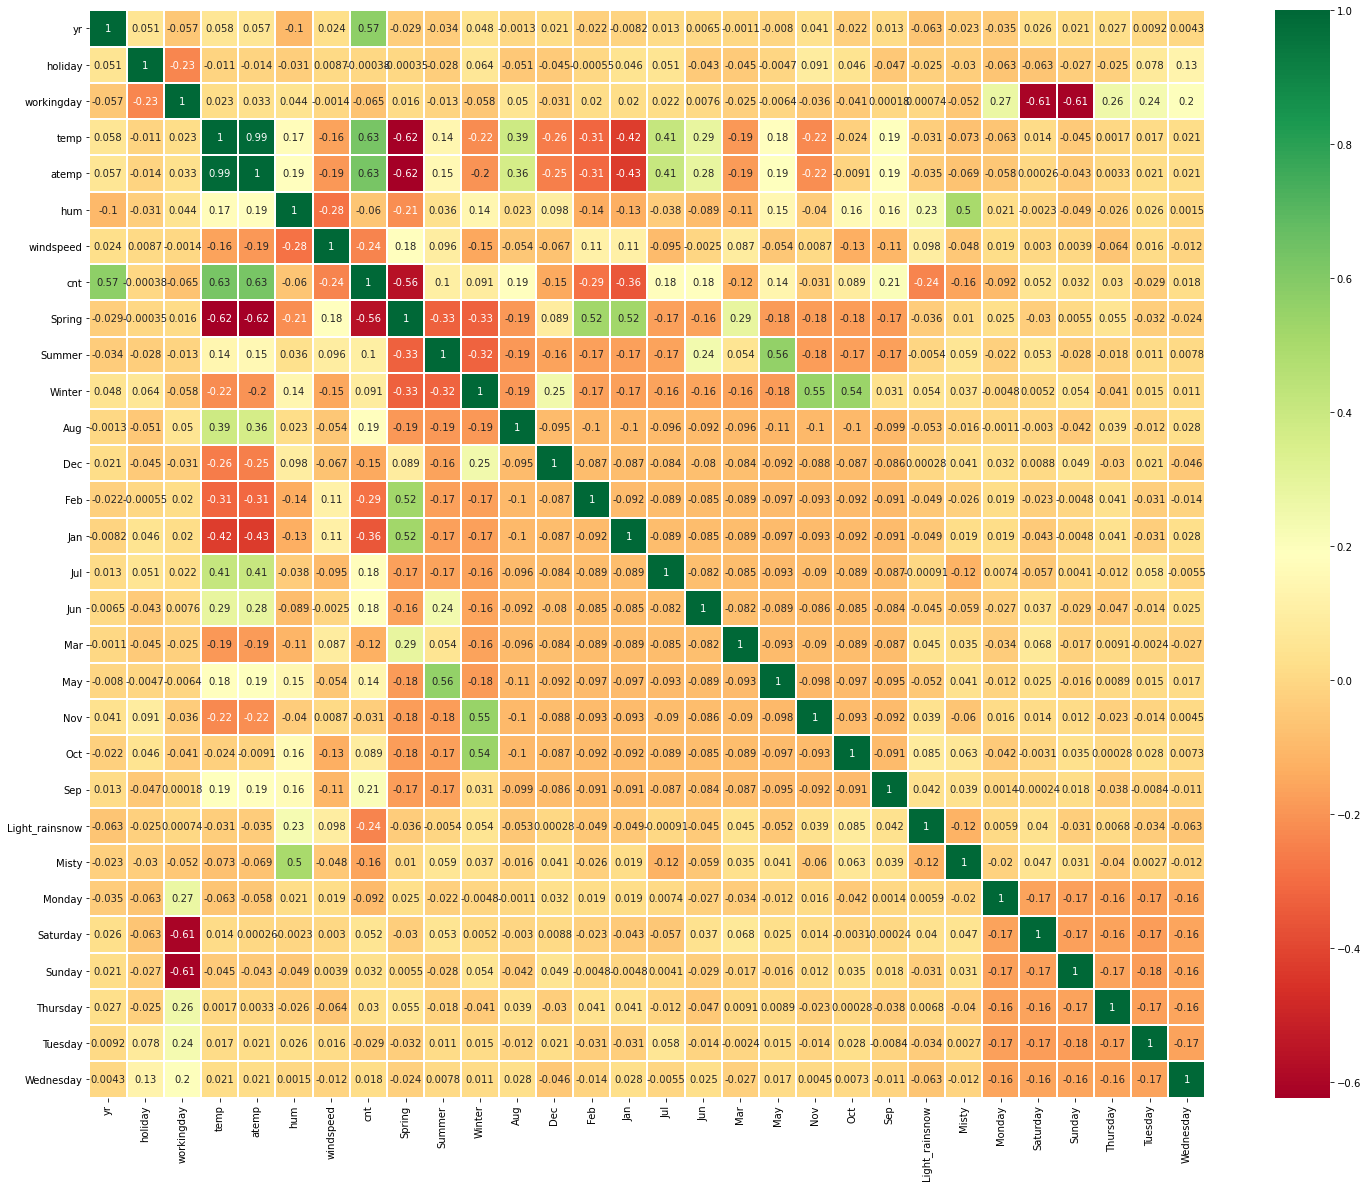

In [62]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

**Insights**
- As previously seen, atemp and temp are highly correlated, we can drop one of them
- Weekends are highly inversly correlated with workingdays
- Spring is inversly correlated with cnt
- misty weather and humidity has correlation

### 10. Building the Linear Model

#### 10.1 Dividing into X_train and y_train

In [63]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### 10.2 Recursive Feature Elimination:

In [64]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 13),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 2),
 ('Thursday', False, 15),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11)]

In [67]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec',
       'Jul', 'Mar', 'Nov', 'Sep', 'Light_rainsnow', 'Misty', 'Saturday'],
      dtype='object')

In [68]:
# removing the rest of the columns 
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'Summer', 'Aug', 'Feb', 'Jan', 'Jun', 'May',
       'Oct', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [69]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [70]:
X_train_rfe.head()

yr      temp     atemp       hum  windspeed  Spring  Winter  Dec  Jul  \
650   1  0.416433  0.409971  0.513852   0.255118       0       1    0    0   
212   0  0.887856  0.819376  0.572294   0.276919       0       0    0    0   
714   1  0.378013  0.381804  0.871429   0.161523       0       1    1    0   
8     0  0.098690  0.048706  0.451083   0.700017       1       0    0    0   
502   1  0.629300  0.619631  0.543723   0.235894       0       0    0    0   

     Mar  Nov  Sep  Light_rainsnow  Misty  Saturday  
650    0    0    0               0      0         0  
212    0    0    0               0      0         0  
714    0    0    0               0      1         0  
8      0    0    0               0      0         0  
502    0    0    0               0      0         1

### 10.3 Manual Model Development using statsmodel

In [71]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [72]:
calculateVIF(X_train_rfe)

Features     VIF
1             temp  357.78
2            atemp  354.14
3              hum   22.92
4        windspeed    5.12
6           Winter    2.76
5           Spring    2.69
13           Misty    2.28
0               yr    2.05
10             Nov    1.83
8              Jul    1.42
7              Dec    1.41
9              Mar    1.23
11             Sep    1.22
12  Light_rainsnow    1.21
14        Saturday    1.20

In [73]:
# Adding a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

In [74]:
# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.9
Date:                Tue, 11 May 2021   Prob (F-statistic):          2.15e-183
Time:                        00:00:22   Log-Likelihood:                 501.85
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     494   BIC:                            -903.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3602      0.033     10.

In [75]:
# Droping column atemp as it has the high p-value
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
2              hum  22.50
1             temp  15.96
3        windspeed   5.01
5           Winter   2.73
4           Spring   2.69
12           Misty   2.27
0               yr   2.05
9              Nov   1.83
7              Jul   1.42
6              Dec   1.41
8              Mar   1.22
10             Sep   1.22
11  Light_rainsnow   1.21
13        Saturday   1.19

In [76]:
# let's build model again 

In [77]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.9
Date:                Tue, 11 May 2021   Prob (F-statistic):          2.15e-183
Time:                        00:00:22   Log-Likelihood:                 501.85
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     494   BIC:                            -903.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3602      0.033     10.

In [78]:
# As hum has the highest VIF value, we will remove the variable next
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
1             temp  5.21
2        windspeed  4.97
4           Winter  2.35
0               yr  2.05
3           Spring  1.90
8              Nov  1.80
11           Misty  1.54
6              Jul  1.38
5              Dec  1.34
7              Mar  1.22
9              Sep  1.21
12        Saturday  1.19
10  Light_rainsnow  1.07

In [79]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.6
Date:                Tue, 11 May 2021   Prob (F-statistic):          2.05e-181
Time:                        00:00:22   Log-Likelihood:                 491.69
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     496   BIC:                            -896.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2710      0.026     10.

In [80]:
#Next we will remove Mar due to high p-value

In [81]:
X_train_new = X_train_new.drop(['Mar'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
1             temp  5.21
2        windspeed  4.96
4           Winter  2.35
0               yr  2.04
7              Nov  1.80
3           Spring  1.79
10           Misty  1.53
6              Jul  1.37
5              Dec  1.32
8              Sep  1.21
11        Saturday  1.18
9   Light_rainsnow  1.07

In [82]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.7
Date:                Tue, 11 May 2021   Prob (F-statistic):          1.99e-180
Time:                        00:00:22   Log-Likelihood:                 486.59
No. Observations:                 510   AIC:                            -947.2
Df Residuals:                     497   BIC:                            -892.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2778      0.026     10.

In [83]:
lr5.params

const             0.277779
yr                0.233276
temp              0.415141
windspeed        -0.151616
Spring           -0.120274
Winter            0.070267
Dec              -0.057022
Jul              -0.045903
Nov              -0.062301
Sep               0.053663
Light_rainsnow   -0.309051
Misty            -0.075320
Saturday          0.025120
dtype: float64

### 11. Model Interpretation

### 12. Model validation

**Validating the assumption of Linear Regression Model**

- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals
- Normality of Errors

#### 12.1 Linear relationships

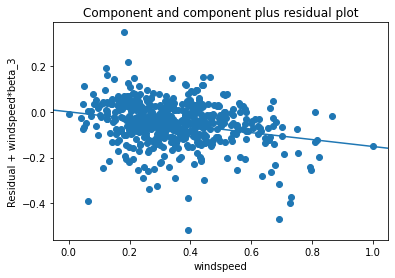

In [84]:
sm.graphics.plot_ccpr(lr5, 'windspeed')
plt.show()

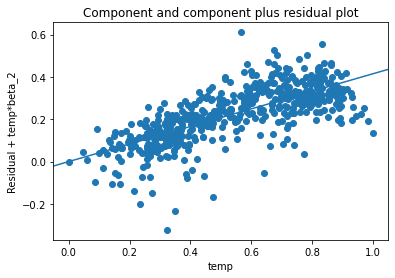

In [85]:
sm.graphics.plot_ccpr(lr5, 'temp')
plt.show()

#### 12.2 Homoscedasticity

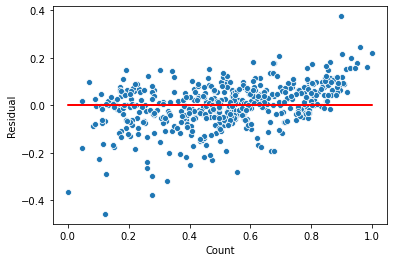

In [86]:
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**There is no visible pattern in residual values, thus homoscedacity is well preserved**

#### 12.4 Absence of Multicolinearity

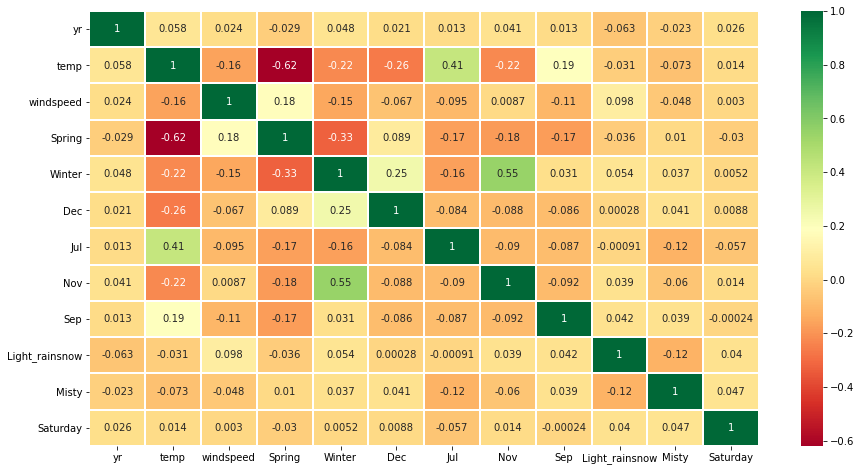

In [87]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [88]:
calculateVIF(X_train_new)

Features   VIF
1             temp  5.21
2        windspeed  4.96
4           Winter  2.35
0               yr  2.04
7              Nov  1.80
3           Spring  1.79
10           Misty  1.53
6              Jul  1.37
5              Dec  1.32
8              Sep  1.21
11        Saturday  1.18
9   Light_rainsnow  1.07

#### 12.5 Normality of error

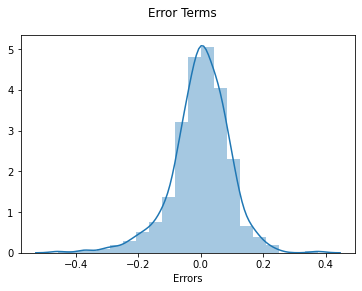

In [89]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

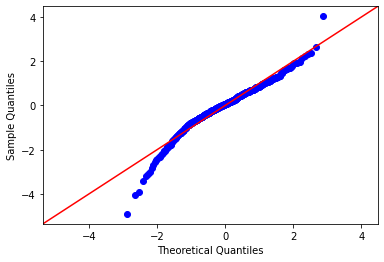

In [90]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### 13. Prediction using final model

In [91]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
22    0        0           1  0.046591  0.025950  0.453529   0.462217   
468   1        0           0  0.543115  0.536771  0.522511   0.347424   
553   1        0           1  0.951196  0.933712  0.596104   0.212829   
504   1        0           1  0.699909  0.662746  0.551083   0.478229   
353   0        0           1  0.407087  0.416610  0.618615   0.080770   

          cnt  Spring  Summer  ...  Oct  Sep  Light_rainsnow  Misty  Monday  \
22   0.110907       1       0  ...    0    0               0      0       0   
468  0.855729       0       1  ...    0    0               0      0       0   
553  0.534975       0       0  ...    0    0               0      0       1   
504  0.817648       0       1  ...    0    0               0      0       1   
353  0.428900       0       0  ...    0    0               0      1       0   

     Saturday  Sunday  Thursday  Tuesday  Wednesday  
22          0       0         0        1          0  
468         0       1         0        0          0  
553         0       0         0        0          0  
504         0       0         0        0          0  
353         0       0         1        0          0  

[5 rows x 30 columns]

In [92]:
bike_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.495455    0.040909    0.690909    0.550981    0.527344    0.662328   
std      0.501120    0.198531    0.463173    0.228967    0.214959    0.143278   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.301299   
25%      0.000000    0.000000    0.000000    0.357562    0.352129    0.553355   
50%      0.000000    0.000000    1.000000    0.557133    0.546299    0.661688   
75%      1.000000    0.000000    1.000000    0.750530    0.707506    0.761905   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.010390   

        windspeed         cnt      Spring      Summer  ...         Oct  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.346015    0.519816    0.236364    0.268182  ...    0.086364   
std      0.159517    0.219880    0.425817    0.444023  ...    0.281541   
min      0.073090    0.055683    0.000000    0.000000  ...    0.000000   
25%      0.232051    0.364818    0.000000    0.000000  ...    0.000000   
50%      0.327568    0.525943    0.000000    0.000000  ...    0.000000   
75%      0.435172    0.683128    0.000000    1.000000  ...    0.000000   
max      0.824380    0.963300    1.000000    1.000000  ...    1.000000   

              Sep  Light_rainsnow       Misty      Monday    Saturday  \
count  220.000000      220.000000  220.000000  220.000000  220.000000   
mean     0.081818        0.036364    0.322727    0.150000    0.140909   
std      0.274713        0.187620    0.468586    0.357886    0.348721   
min      0.000000        0.000000    0.000000    0.000000    0.000000   
25%      0.000000        0.000000    0.000000    0.000000    0.000000   
50%      0.000000        0.000000    0.000000    0.000000    0.000000   
75%      0.000000        0.000000    1.000000    0.000000    0.000000   
max      1.000000        1.000000    1.000000    1.000000    1.000000   

           Sunday    Thursday     Tuesday   Wednesday  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.136364    0.150000    0.122727    0.168182  
std      0.343957    0.357886    0.328872    0.374881  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [93]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [94]:
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)

X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   temp            220 non-null    float64
 3   windspeed       220 non-null    float64
 4   Spring          220 non-null    uint8  
 5   Winter          220 non-null    uint8  
 6   Dec             220 non-null    uint8  
 7   Jul             220 non-null    uint8  
 8   Nov             220 non-null    uint8  
 9   Sep             220 non-null    uint8  
 10  Light_rainsnow  220 non-null    uint8  
 11  Misty           220 non-null    uint8  
 12  Saturday        220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(9)
memory usage: 10.5 KB


In [95]:
y_pred = lr5.predict(X_test_lm5)

### 14. Model evaluation

Text(0, 0.5, 'y_pred')

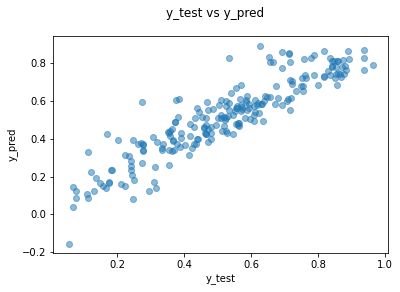

In [96]:
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

**R2 Value**

In [97]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8264

**Adjusted R2 Value**

In [98]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8163

**RSME**

In [99]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0914

#### 15. Model Outcome summary

In [100]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.7
Date:                Tue, 11 May 2021   Prob (F-statistic):          1.99e-180
Time:                        00:00:23   Log-Likelihood:                 486.59
No. Observations:                 510   AIC:                            -947.2
Df Residuals:                     497   BIC:                            -892.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2778      0.026     10.751      0.000       0.227       0.329
yr                 0.2333      0.008     27.603      0.000       0.217       0.250
temp               0.4151      0.032     12.865      0.000       0.352       0.479
windspeed         -0.1516      0.027     -5.521      0.000      -0.206      -0.098
Spring            -0.1203      0.016     -7.614      0.000      -0.151      -0.089
Winter             0.0703      0.015      4.831      0.000       0.042       0.099
Dec               -0.0570      0.018     -3.222      0.001      -0.092      -0.022
Jul               -0.0459      0.018     -2.595      0.010      -0.081      -0.011
Nov               -0.0623      0.019     -3.209      0.001      -0.100      -0.024
Sep                0.0537      0.016      3.349      0.001       0.022       0.085
Light_rainsnow    -0.3091      0.027    -11.406      0.000      -0.362      -0.256
Misty             -0.0753      0.009     -8.350      0.000      -0.093      -0.058
Saturday           0.0251      0.012      2.093      0.037       0.002       0.049
==============================================================================
Omnibus:                       73.092   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.309
Skew:                          -0.724   Prob(JB):                     2.12e-41
Kurtosis:                       5.592   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Temperature**, **Light_rainsnow** and **yr** are the variables having high impact on bike renting. It is recommended that bike availabilty and promos to be increased during the summer months. 